A2 de Linguagens de Programação – 26/11/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [6]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Cristiana Aparecida Nogueira Couto
Olá, Cristiana Aparecida Nogueira Couto!
Bom trabalho!


In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import operator


from collections import Counter
import re
import string
import time

import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
from IPython.display import clear_output
%matplotlib inline

Questão 1 (1,0 ponto):  

Utilizando Python + SQL, crie uma tabela "aluno" em banco de dados no sqlite que tenha os seguintes campos:

+ id 
+ nome
+ data_nascimento
+ matricula

Escolha os tipos de dados apropriados. O campo id é chave primária, e deve ser autoincrementável. 

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_using_autoincrement.htm  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [326]:
conn = sqlite3.connect('../../Dados/meudatabase.sqlite')
cur = conn.cursor()

In [328]:
q = '''CREATE TABLE alunos(
id INTEGER PRIMARY KEY AUTOINCREMENT, 
nome TEXT NOT NULL, 
data_nascimento TEXT NOT NULL, 
matricula BLOB)'''

cur.execute(q)

In [330]:
cur.execute("SELECT * FROM sqlite_master;")
for r in cur.fetchall():
    print(r)

('table', 'aluno', 'aluno', 2, 'CREATE TABLE aluno(\nid INTEGER PRIMARY KEY AUTOINCREMENT, \nnome TEXT, \ndata_nascimento TEXT, \nmatricula BLOB)')
('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')
('table', 'alunos', 'alunos', 4, 'CREATE TABLE alunos(\nid INTEGER PRIMARY KEY AUTOINCREMENT, \nnome TEXT NOT NULL, \ndata_nascimento TEXT NOT NULL, \nmatricula BLOB)')


In [333]:
#Exemplo inserindo um dado
q1 = '''INSERT INTO alunos(nome,data_nascimento,matricula)
VALUES ( 'Cristiana Aparecida Nogueira Couto', '29/02/2000', 'B37220' );
'''
cur.execute(q1)

In [335]:
#Verificando se o auto incremento funciona e os dados estão na tabela
cur.execute("SELECT * FROM alunos;")
for r in cur.fetchall():
    print(r)

(1, 'Cristiana Aparecida Nogueira Couto', '29/02/2000', 'B37220')


Questão 2 (1.5 ponto):  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos Python + SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [377]:
conn = sqlite3.connect('../../Dados/iris_database.sqlite')
cur = conn.cursor()

In [378]:
cur.execute("SELECT * FROM iris;")
for r in cur.fetchall():
    print(r)

(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa')
(2, 4.9, 3, 1.4, 0.2, 'Iris-setosa')
(3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa')
(4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
(5, 5, 3.6, 1.4, 0.2, 'Iris-setosa')
(6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa')
(7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa')
(8, 5, 3.4, 1.5, 0.2, 'Iris-setosa')
(9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa')
(10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa')
(11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa')
(12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa')
(13, 4.8, 3, 1.4, 0.1, 'Iris-setosa')
(14, 4.3, 3, 1.1, 0.1, 'Iris-setosa')
(15, 5.8, 4, 1.2, 0.2, 'Iris-setosa')
(16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa')
(17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa')
(18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa')
(19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa')
(20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa')
(21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa')
(22, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa')
(23, 4.6, 3.6, 1, 0.2, 'Iris-setosa')
(24, 5.1, 3.3, 1.7, 0.5, 'Iris-setosa')
(25, 4.8, 3.4, 1.9, 0.2, 'Iris-setosa')
(26, 5, 3, 1.6, 0.2, 'I

In [379]:
cur.execute("SELECT * FROM sqlite_master;")
for r in cur.fetchall():
    print(r)

('table', 'Iris', 'Iris', 2, 'CREATE TABLE Iris (\n    Id INTEGER PRIMARY KEY,\n    SepalLengthCm NUMERIC,\n    SepalWidthCm NUMERIC,\n    PetalLengthCm NUMERIC,\n    PetalWidthCm NUMERIC,\n    Species TEXT)')


In [380]:
# a)
sqlcomando = """ select distinct Species from Iris """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

('Iris-setosa',)
('Iris-versicolor',)
('Iris-virginica',)


In [381]:
#b) Há 150 registros
sqlcomando = """ select count(*) from Iris """
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

(150,)


In [382]:
#c) 
sqlcomando = """ select Species, avg(PetalWidthCm*PetalLengthCm) from Iris group by Species"""
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

('Iris-setosa', 0.36280000000000023)
('Iris-versicolor', 5.7204)
('Iris-virginica', 11.296199999999994)


In [383]:
#d)
sqlcomando = """ select Species, avg(SepalLengthCm*SepalWidthCm + PetalWidthCm*PetalLengthCm) from Iris group by Species"""
cur.execute(sqlcomando)
for r in cur.fetchall():
    print(r)

('Iris-setosa', 17.571600000000004)
('Iris-versicolor', 22.246600000000004)
('Iris-virginica', 30.9808)


Questão 3 (1.5 pontos):  

Importe o arquivo ../../Dados/votesurvey.xls para um dataframe do Python usando o método apropriado, e responda às questões:  

a) Exiba as 15 primeiras linhas (essa é muito fácil!).  
b) Qual a média de salário desejado, dentre os eleitores de cada presidente?  
c) Qual fator tem maior influência sobre o salário atual? Sexo ou Idade?  
d) Crie uma nova coluna no dataframe original que exiba o salário atual dividido pela idade.  

In [148]:
#a)
df = pd.read_excel('../../Dados/votesurvey.xls')
df.loc[0:14, :]

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush
9,Male,26,120000,80000,Bush


In [130]:
#b)
df.groupby(['Candidate'])['Expected salary'].mean()

Candidate
Bush                111666.666667
Gore                103055.555556
Refuse to answer    119500.000000
Undecided           103000.000000
Name: Expected salary, dtype: float64

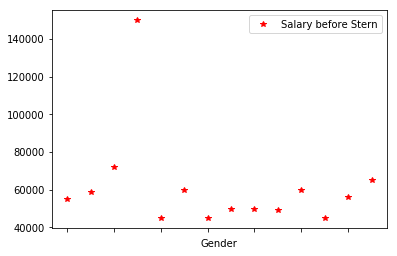

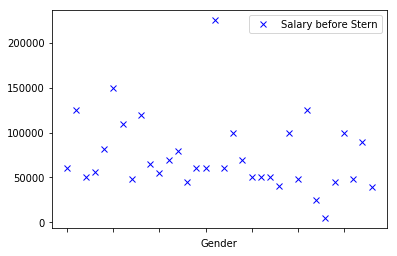

In [248]:
#c)
#Separando os dados entre gêneros. Primeiro apenas as linhas com mulheres
x2 = df[df.Gender == 'Female']
x2.plot(x = 'Gender', y = 'Salary before Stern', style = 'r*')

#Agora separo entre apenas os homens
x3 = df[df.Gender == 'Male']
x3.plot(x = 'Gender', y = 'Salary before Stern', style = 'bx')

# Note que no gráfico onde estão apenas os homens as marcas que representam cada indivíduo estão muito mais
# espalhadas entre os valores mais altos de salário.

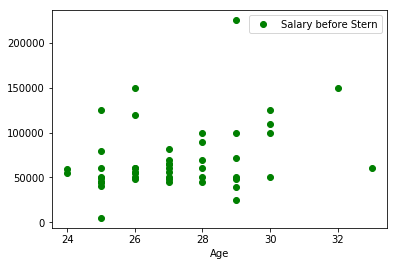

In [249]:
#Aqui fazemos uma comparação entre as idades
# Analisando a partir da idade dos indíviduos, através da visualização dos gráficos, é possível ver que os salários estão 
# muito mais "igualmente" distribuidos do que em relação ao gênero. Desse modo, o gênero tem maior influência sobre o salário do
# que a idade.

df.plot(x = 'Age', y = 'Salary before Stern', style = 'go')

In [251]:
#d) 
df['Salary by age'] = df.apply(lambda row: row['Salary before Stern'] / row['Age'], axis=1)
df.head()

,Gender,Age,Salary before Stern,Expected salary,Candidate,Salary by age
0,Male,27,60000,110000,Bush,2222.222222
1,Male,30,125000,125000,Bush,4166.666667
2,Male,27,50000,120000,Bush,1851.851852
3,Male,26,56000,100000,Bush,2153.846154
4,Male,27,82000,100000,Bush,3037.037037


Questão 4 (1.5 pontos): 

Transforme o arquivo ../../Dados/DomCasmurroMachadoAssis.txt em uma string no Python e responda, usando, quando possível, expressões regulares:  

a) Quais as 10 palavras mais frequentes que _começam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com letras _maiúsculas_ há no texto?  
c) Quantas palavras há no texto com apenas uma; com apenas duas; e com apenas 3 vogais?  

In [33]:
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding='utf-8') as f:
    texto = f.read()
texto = [p.strip(string.punctuation) for p in texto.split()]
texto = [i for i in texto if not i[0:1].isdigit()]


In [285]:
#a)
a_comeca = [p for p in texto if re.search(r'^[AÁÂÀaáâà].*', p)]

freq = {}
for p in a_comeca:
        if p not in freq:
            freq[p] = 1
        else:
            freq[p] += 1

sorted_freq = sorted(freq.items(), key=operator.itemgetter(1))
sorted_freq[-10:]

[('aos', 85),
 ('até', 97),
 ('agora', 118),
 ('assim', 120),
 ('ainda', 129),
 ('A', 248),
 ('á', 261),
 ('ao', 329),
 ('as', 498),
 ('a', 2315)]

In [262]:
#b) 
maiusculas = list(set(texto))
maiusculas = [p for p in maiusculas if re.search(r'^[A-ZÁÂÀÃEÉÊÔÚÇ]', p)]

print(len(maiusculas))

1603


In [296]:
#c) Com apenas uma vogal
vogal1 = [p for p in texto if re.search(r'^[^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*[AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú][^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*$', p)]
print(len(vogal1))

21799


In [299]:
#Com apenas duas vogais
vogal2 = [p for p in texto if re.search(r'^[^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*[AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú][^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*[AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú][^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*$', p)]
print(len(vogal2))

24379


In [304]:
#Com apenas três vogais
vogal3 = [p for p in texto if re.search(r'^[^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*[AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú][^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*[AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú][^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*[AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú][^AEIOUÁÀÂÃÉÊÈÍÔÓÕÚaeiouáàâãéêèíôóõú]*$', p)]
print(len(vogal3))

13198


Questão 5 (1.5 pontos):    

Utilizando apenas o Shell Linux, e utilizando o arquivo ../../Dados/DomCasmurroMachadoAssis.txt, diga os comandos para responder às seguintes perguntas:  

a) Quais as 10 palavras mais frequentes que _terminam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com _minúsculas_ há no texto?   
c) Como ordenar as palavras distintas por ordem de "rima"?  

In [185]:
! cat ../../Dados/DomCasmurroMachadoAssis.txt | head











cat: write error: Broken pipe


In [263]:
#a)
! tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' < ../../Dados/DomCasmurroMachadoAssis.txt |sort | grep '[aáàâãAÁÀÂÃ]$' |uniq -c | sort -nr| sed 5q

   2414 a
    623 da
    532 para
    468 era
    398 uma
sort: write failed: 'standard output': Broken pipe
sort: write error


In [267]:
#b) Coloquei as restrições de acentuação!
! tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' < ../../Dados/DomCasmurroMachadoAssis.txt |sort | uniq | grep '^[a-záàâãéêíôóõúç]' | wc -l

1250
uniq: write error: Broken pipe


In [269]:
#c)
# Transforma maiusculas em minusculas
# porém o rev não funciona aqui :(
! tr '[A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[a-záàâãéêíôóõúç]' < ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç]' '[\012*]'  | sort | uniq | sed 10q 


�
a
á
ab
abafadas
abafado
abafando
abafava
abahuladas
uniq: write error: Broken pipe


In [241]:
#Aqui funciona mas ele não diferencia maiusculas e minusculas
!cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' |sort |uniq | rev | sort | rev | head

rev: stdin: Invalid or incomplete multibyte or wide character

]
a
A
á
acaba
barba
ameaça
bocca
Bibliotheca
uniq: write error: Broken pipe


Questão 6 (2.0 ponto):  

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Leia para dataframes do Pandas as tabelas "invoices", "invoice_items", "customers" e "tracks"; e mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Crie um histograma de faixas ("tracks") mais compradas.  
c) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [754]:
conn = sqlite3.connect('../../Dados/chinook.sqlite')
cur = conn.cursor()
#invoice=fatura

In [755]:
cur.execute("SELECT * FROM sqlite_master;")
#for r in cur.fetchall():
  #  print(r)

In [569]:
#a)
df_invoice = pd.read_sql_query("SELECT * FROM invoices;", conn)

df_invoice_items = pd.read_sql_query("SELECT * FROM invoice_items;", conn)

df_customers = pd.read_sql_query("SELECT * FROM customers;", conn)

df_tracks = pd.read_sql_query("SELECT * FROM tracks;", conn)

df_M = df_customers.set_index('FirstName').filter(regex='^M', axis= 0)

a = list(df_M.CustomerId)

df_filtrado_M = df_invoice[df_invoice['CustomerId'].isin(a)]

b = list(df_filtrado_M.InvoiceId)

df_invoice_items_fM = df_invoice_items.TrackId[df_invoice_items['InvoiceId'].isin(b)]

c = list(df_invoice_items_fM)


df_tracks_M = df_tracks[df_tracks['TrackId'].isin(c)]

#Aqui estão as músicas compradas por todos os clientes cujo primeiro nome começa com M
df_tracks_M

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
41,42,Right Through You,6,1,1,Alanis Morissette & Glenn Ballard,176117,5793082,0.99
47,48,Not The Doctor,6,1,1,Alanis Morissette & Glenn Ballard,227631,7604601,0.99
53,54,Bleed The Freak,7,1,1,Jerry Cantrell,241946,7847716,0.99
59,60,Confusion,7,1,1,"Jerry Cantrell, Michael Starr, Layne Staley",344163,11183647,0.99
65,66,Por Causa De Você,8,1,2,None,169900,5536496,0.99
71,72,Angela,8,1,2,None,169508,5574957,0.99
77,78,Master Of Puppets,9,1,3,Apocalyptica,436453,14375310,0.99
83,84,Welcome Home (Sanitarium),9,1,3,Apocalyptica,350197,11406431,0.99
89,90,Set It Off,10,1,1,Audioslave/Chris Cornell,263262,6321091,0.99
168,169,Body Count,18,1,4,None,317936,10489139,0.99


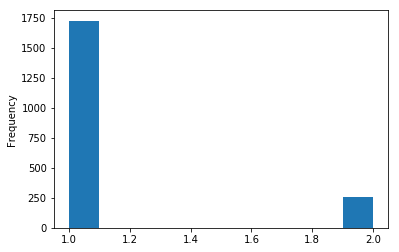

In [666]:
#b)
dfT = df_invoice_items.groupby('TrackId').size()

dfTfreq = list(dfT)

dfTracks = list(df_invoice_items.TrackId)

dfTracks = list(set(dfTracks))

dfT.plot(kind='hist')


In [771]:
#c) tentativa de por em uma lista
df_album = pd.read_sql_query("SELECT * FROM albums;", conn)

df_artist = pd.read_sql_query("SELECT * FROM artists;", conn)

q = """ select artists.Name, albums.title from albums 
inner join artists
on artists.ArtistId= albums.ArtistId"""

lista = []
cur.execute(q)
for r in cur.fetchall():
    lista.append(r)
    

Auto-avaliação (1 ponto):    
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.    

Gostei bastante da maior parte dos conteúdos apresentados na disciplina. Python é uma linguagem muito interessante e tem várias aplicações. A parte de processamento de textos foi uma das minhas favoritas. Creio que poderia ter aproveitado melhor a disciplina, principalmente no período pré A1, mas acredito que foi mais por questões pessoais do que falta de afinidade pelo conteúdo. A parte lógica algumas vezes foi um pouco difícil pra mim e também seguir uma rotina de resolução de problemas. Mas num geral foi possível construir uma base sólida de conhecimentos de python e estruturas que poderão ajudar em outras linguagens.  
Algumas sugestões são: os notebooks muitas vezes contêm alguns codigos soltos mais avançados que não são explicados, sinalizar o que eles significam ajuda bastante a estudar depois, mais exercíos seria legal também. No momento são as sugestões que consigo pensar! Vou sentir falta das suas aulas!! <3 

obs: atribui um valor de 0,8